In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
# Read crypto_data.csv into Pandas. The dataset was obtained from CryptoCompare.

file_path = Path("./crypto_data.csv")
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
#Discard all cryptocurrencies that are not being traded. 
#In other words, filter for currencies that are currently being traded. 

df = df.loc[df['IsTrading'] == True] 

In [4]:
#Once you have done this, drop the IsTrading column from the dataframe.

df=df.drop(['IsTrading'], axis =1)
df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [5]:
#Remove all rows that have at least one null value.


df= df.dropna()
df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [6]:
#convert Total coin supply to numeric

df["TotalCoinSupply"] = pd.to_numeric(df["TotalCoinSupply"])
df.dtypes

<ipython-input-6-bc0c4d4606ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TotalCoinSupply"] = pd.to_numeric(df["TotalCoinSupply"])


Unnamed: 0          object
CoinName            object
Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [7]:
#Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.

df = df.loc[df['TotalCoinsMined'] > 0] 
df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,3.141593e+11
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,2.100000e+07
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0.000000e+00
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2.000000e+09
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,2.500000e+08
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1.400223e+09
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,2.100000e+07


In [8]:
# Create a new DataFrame that holds only the cryptocurrencies names if needed later

crypto_name_df = pd.DataFrame(df.CoinName)
print(crypto_name_df.shape)
crypto_name_df.head()

(532, 1)


,CoinName
0,42 Coin
2,404Coin
5,EliteCoin
7,Bitcoin
8,Ethereum


In [9]:
#In order for your dataset to be comprehensible to a machine learning algorithm, 
#its data should be numeric. Since the coin names do not contribute to the analysis of the data, 
#delete the CoinName & Unnnamed from the original dataframe.

df=df.drop(['CoinName'], axis =1)
df=df.drop(['Unnamed: 0'], axis =1)
df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
2,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
5,X13,PoW/PoS,2.927942e+10,3.141593e+11
7,SHA-256,PoW,1.792718e+07,2.100000e+07
8,Ethash,PoW,1.076842e+08,0.000000e+00
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2.000000e+09
1242,Scrypt,PoW/PoS,1.493105e+07,2.500000e+08
1245,CryptoNight,PoW,9.802226e+08,1.400223e+09
1246,Equihash,PoW,7.296538e+06,2.100000e+07


In [10]:
#Your next step in data preparation is to convert the remaining features with text values, 
#Algorithm and ProofType, into numerical data. 
#To accomplish this task, use Pandas to create dummy variables.

df_numerical = pd.get_dummies(df)
df_numerical

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Q: Examine the number of rows and columns of your dataset now. How did they change?


A: rows remained same, number of columns increased from  4 to 98

In [11]:
#Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numerical)
scaled_data

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

Creating dummy variables above dramatically increased the number of features in your dataset. Perform dimensionality reduction with PCA. Rather than specify the number of principal components when you instantiate the PCA model, it is possible to state the desired explained variance. For example, say that a dataset has 100 features. Using PCA(n_components=0.99) creates a model that will preserve approximately 99% of the explained variance, whether that means reducing the dataset to 80 principal components or 3. For this project, preserve 90% of the explained variance in dimensionality reduction. How did the number of the features change?

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)
identify_pca = pca.fit_transform(scaled_data)
identify_pca.shape

(532, 74)

 74 principal components were identified from 98 original options

Next, further reduce the dataset dimensions with t-SNE and visually inspect the results. In order to accomplish this task, run t-SNE on the principal components: the output of the PCA transformation. Then create a scatter plot of the t-SNE output. Observe whether there are distinct clusters or not.





In [13]:
from sklearn.manifold import TSNE

# Initialize t-SNE model
tsne = TSNE(learning_rate=500)
# Reduce dimensions
tsne_features = tsne.fit_transform(identify_pca)
tsne_features.shape
# The dataset has 2 columns
df_pca = pd.DataFrame(identify_pca)
df_pca

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,-1.121238e-11,7.247793e-15,4.985888e-14,-0.007129,-1.319756,-0.051813,...,-4.068711e-15,-2.921701e-15,6.233172e-15,-1.700418e-16,2.824095e-15,2.004597e-15,8.255597e-16,6.893817e-15,-4.163074e-15,-1.089444e-17
1,-0.318434,1.032331,-0.591126,0.001386,-1.112065e-11,7.258881e-15,5.011631e-14,-0.007739,-1.322514,-0.056674,...,-3.480770e-15,-2.859026e-15,6.459527e-15,-5.279400e-16,2.970592e-15,2.071569e-15,6.917538e-16,6.869072e-15,-4.378003e-15,-3.033915e-16
2,2.305468,1.656383,-0.683617,0.004731,-3.805810e-11,1.702648e-14,7.711541e-14,-0.054781,-1.542879,-0.943951,...,2.787749e-14,1.736826e-14,-1.976888e-13,-7.927011e-14,-1.294399e-13,-2.449878e-14,2.090025e-14,-9.894746e-14,8.120045e-14,2.495612e-14
3,-0.145184,-1.320593,0.192813,-0.001229,9.882821e-12,-4.647659e-15,-1.831416e-14,-0.002071,0.281463,0.251862,...,-1.175630e-15,-5.731113e-16,-2.781339e-14,-1.876053e-14,-2.060526e-14,-1.399252e-14,9.726403e-15,-1.941526e-14,1.164214e-14,-6.014301e-17
4,-0.151768,-2.036192,0.396182,-0.001705,1.370341e-11,-9.723924e-15,-3.946073e-14,0.027735,0.519099,0.188820,...,-9.661516e-14,4.656551e-14,-1.092011e-13,-7.961008e-14,-1.056005e-13,-6.446396e-14,9.514656e-14,-3.392030e-14,-2.216864e-14,-1.071406e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.471251,0.822241,-0.071160,-0.008206,6.638106e-11,3.284277e-14,4.141509e-14,-0.851713,2.041159,3.560713,...,-3.042523e-15,4.096758e-16,-3.152339e-14,-2.015831e-14,-2.383729e-14,-1.310344e-14,1.213876e-14,-1.902783e-14,9.811415e-15,-3.441389e-15
528,-0.333144,1.032071,-0.590740,0.001399,-1.123112e-11,7.244904e-15,4.999034e-14,-0.007154,-1.320125,-0.052460,...,-3.472760e-15,-2.848912e-15,6.443636e-15,-8.082950e-16,3.061125e-15,2.045975e-15,7.189074e-16,6.877516e-15,-4.164166e-15,-1.837882e-16
529,0.324349,-2.312308,0.421515,-0.001319,1.059097e-11,-7.041105e-15,-3.570875e-14,0.017309,0.161077,-0.047787,...,-5.048705e-14,6.845338e-15,-1.008283e-13,-4.301340e-14,-1.337748e-13,-3.430010e-14,6.301711e-14,-4.188908e-14,1.470830e-14,-3.370298e-14
530,-0.149364,-2.049336,0.412968,-0.001745,1.401783e-11,-9.590774e-15,-3.930464e-14,0.028954,0.544389,0.233373,...,1.210580e-15,-7.211150e-15,3.525695e-15,-1.621268e-15,7.053654e-15,-5.505319e-15,8.009962e-16,3.562371e-15,5.816281e-15,2.933333e-15


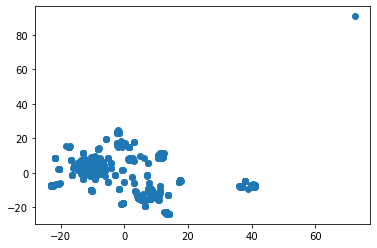

In [14]:
# Prepare to plot the dataset

# The first column of transformed features
df_pca['x'] = tsne_features[:,0]

# The second column of transformed features
df_pca['y'] = tsne_features[:,1]

# Visualize the clusters
plt.scatter(df_pca['x'], df_pca['y'])
plt.show()

looks like there are some clusters but not very identifiable 

Create an elbow plot to identify the best number of clusters. Use a for-loop to determine the inertia for each k between 1 through 10. Determine, if possible, where the elbow of the plot is, and at which value of k it appears.




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


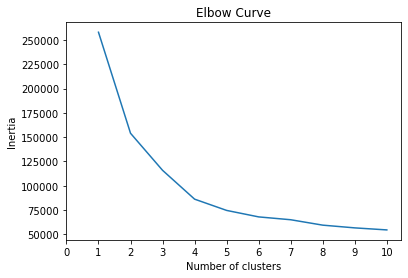

In [15]:
from sklearn.cluster import KMeans

# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_pca)
    inertia.append(km.inertia_)


# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [16]:
# Predicting clusters with k=4

# Initialize the k-means model
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(df_pca)

# Predict clusters
predictions = model.predict(df_pca)

predictions

array([1, 1, 1, 2, 0, 0, 3, 0, 0, 0, 3, 0, 2, 2, 0, 1, 3, 0, 1, 1, 0, 0,
       2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 2, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 1, 3, 0, 3, 2, 0, 0, 0, 1, 0, 0, 3, 0, 2, 3, 1, 0,
       2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 3, 3, 2, 0, 2, 1, 3, 2, 2, 2, 3, 1,
       1, 0, 0, 3, 0, 3, 0, 2, 1, 1, 0, 0, 0, 3, 0, 2, 1, 0, 3, 0, 1, 0,
       3, 0, 1, 1, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 2, 0, 3, 1, 3, 0, 2, 1,
       3, 3, 0, 0, 3, 0, 1, 0, 2, 1, 3, 2, 1, 0, 0, 2, 3, 0, 2, 2, 1, 1,
       3, 3, 3, 0, 0, 3, 3, 2, 0, 3, 0, 3, 3, 2, 2, 1, 3, 0, 3, 1, 1, 1,
       1, 3, 3, 0, 3, 1, 0, 2, 2, 3, 1, 0, 1, 0, 3, 2, 0, 0, 1, 3, 1, 3,
       0, 3, 1, 1, 3, 1, 0, 0, 3, 3, 0, 3, 1, 3, 3, 1, 1, 3, 3, 3, 2, 1,
       3, 1, 1, 3, 0, 1, 3, 1, 1, 1, 0, 0, 0, 0, 1, 2, 3, 1, 3, 1, 0, 3,
       0, 0, 1, 3, 0, 1, 0, 0, 3, 0, 3, 1, 3, 0, 3, 3, 1, 3, 3, 1, 1, 1,
       2, 3, 0, 3, 2, 3, 1, 1, 2, 0, 3, 0, 1, 0, 0, 0, 0, 1, 3, 1, 1, 0,
       1, 0, 3, 3, 1, 0, 1, 0, 0, 1, 3, 3, 1, 2, 3,

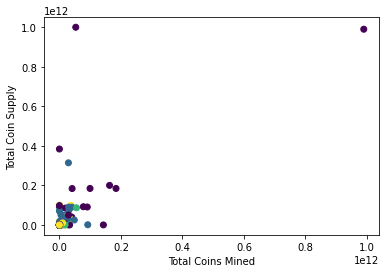

In [17]:
import numpy as np
df['class'] = predictions
# show_clusters function
plt.scatter(x=df["TotalCoinsMined"], y=df["TotalCoinSupply"],c=df['class'])
plt.xlabel('Total Coins Mined')
plt.ylabel('Total Coin Supply')

plt.show()

In [18]:
#it looks like there are some outliers that might hinger a good visualistion of the clusters, so will attempt to remove them
new_df = df[["TotalCoinsMined","TotalCoinSupply","class"]]



In [19]:
from scipy import stats
z_scores = stats.zscore(new_df)
#calculate z-scores of `df`

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df2 = new_df[filtered_entries]

new_df2

,TotalCoinsMined,TotalCoinSupply,class
0,4.199995e+01,4.200000e+01,1
2,1.055185e+09,5.320000e+08,1
7,1.792718e+07,2.100000e+07,2
8,1.076842e+08,0.000000e+00,0
9,6.303924e+07,8.400000e+07,0
...,...,...,...
1238,2.000000e+09,2.000000e+09,2
1242,1.493105e+07,2.500000e+08,1
1245,9.802226e+08,1.400223e+09,0
1246,7.296538e+06,2.100000e+07,0


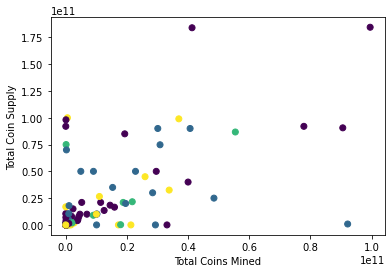

In [20]:
#new plot without some outliers
import numpy as np
df['class'] = predictions
# show_clusters function
plt.scatter(x=new_df2["TotalCoinsMined"], y=new_df2["TotalCoinSupply"],c=new_df2['class'])
plt.xlabel('Total Coins Mined')
plt.ylabel('Total Coin Supply')

plt.show()

The k-means algorithm is an unsupervised clustering algorithm. It takes a bunch of unlabeled points and tries to group them into “k” number of clusters.

It is unsupervised because the points have no external classification.

The “k” in k-means denotes the number of clusters you want to have in the end. In this we identified that k = 4, we will have 4 clusters on the data set.

Looking at the plots does not look very identifiable clusters, but the plot is using only two of the independent values. would have to test the model on real data to come up with an accurate conclusion if the model is a good predictor or not.